In [4]:
# pip install opencv-python matplotlib numpy torch torchvision tensorflow

import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

# Optional: For CNN with Keras (if you want to try both frameworks)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, InputLayer

# Device setup for PyTorch (CUDA support)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


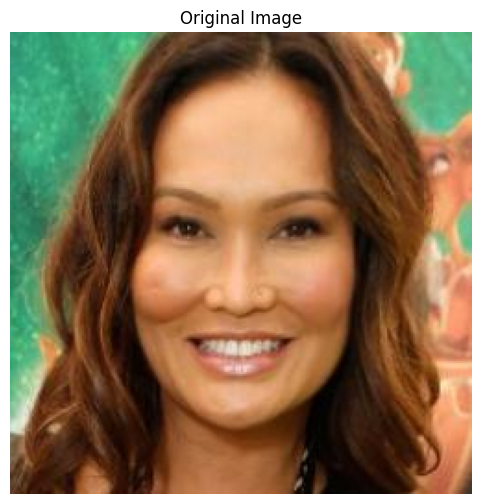

In [5]:
# Replace 'your_image.jpg' with your image path
img_path = r'C:\Users\nikhi\OneDrive\Desktop\img2sketch\FS2K\photo\photo1\image0001.jpg'
image = cv2.imread(img_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {img_path}")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


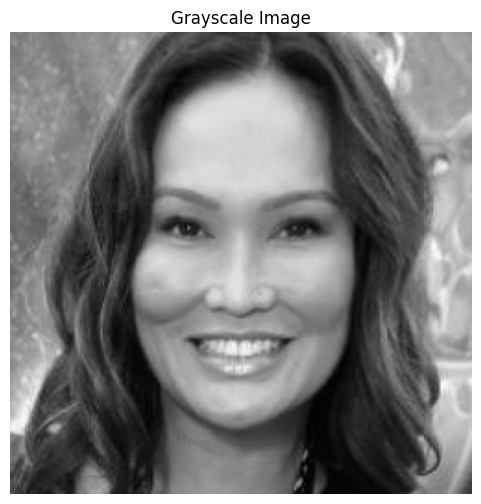

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6,6))
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()


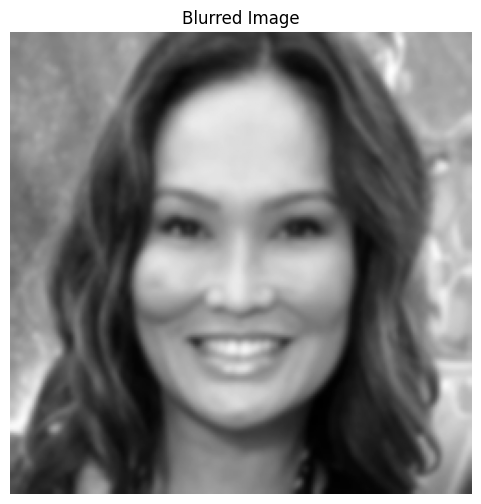

In [7]:
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
plt.figure(figsize=(6,6))
plt.title("Blurred Image")
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()


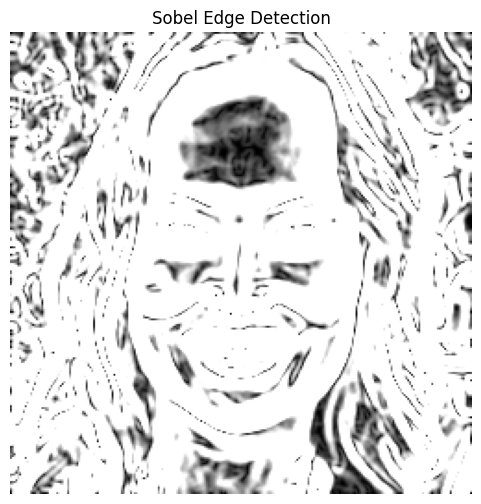

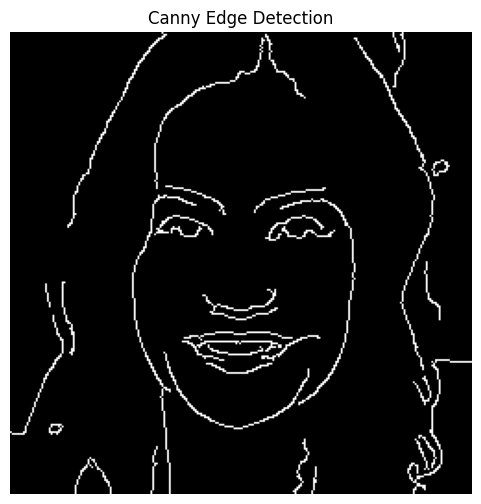

In [8]:
# Sobel Edge Detection
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.magnitude(sobelx, sobely)
sobel = np.uint8(np.clip(sobel, 0, 255))

plt.figure(figsize=(6,6))
plt.title("Sobel Edge Detection")
plt.imshow(sobel, cmap='gray')
plt.axis('off')
plt.show()

# Canny Edge Detection
edges = cv2.Canny(blurred, 50, 150)
plt.figure(figsize=(6,6))
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


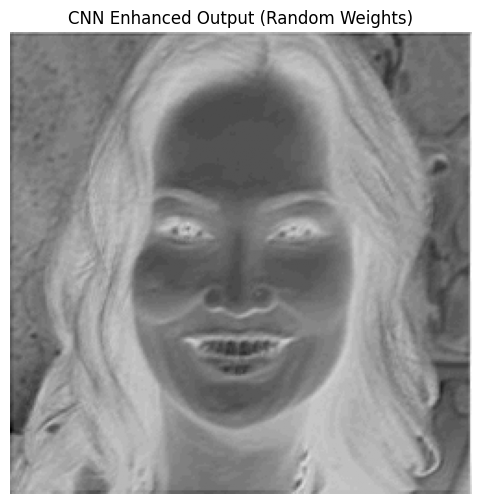

In [9]:
# Prepare image for CNN (expand dims, normalize)
input_img = gray.astype('float32') / 255.0
input_img = np.expand_dims(input_img, axis=(0, -1))  # Shape: (1, H, W, 1)

# Define a shallow CNN
model = Sequential([
    InputLayer(input_shape=(gray.shape[0], gray.shape[1], 1)),
    Conv2D(8, (3,3), activation='relu', padding='same'),
    Conv2D(1, (3,3), activation='sigmoid', padding='same')
])

# Random weights (for demo); in practice, train on sketch dataset
cnn_output = model.predict(input_img)
cnn_output = np.squeeze(cnn_output) * 255
cnn_output = cnn_output.astype('uint8')

plt.figure(figsize=(6,6))
plt.title("CNN Enhanced Output (Random Weights)")
plt.imshow(cnn_output, cmap='gray')
plt.axis('off')
plt.show()


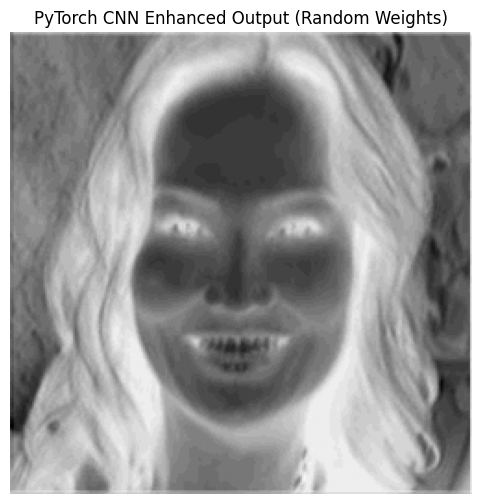

In [10]:
import torch.nn as nn

class ShallowCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(8, 1, 3, padding=1)
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.sigmoid(self.conv2(x))
        return x

# Prepare input
gray_tensor = torch.from_numpy(gray.astype(np.float32) / 255.0).unsqueeze(0).unsqueeze(0).to(device)  # Shape: (1, 1, H, W)
model_pt = ShallowCNN().to(device)
with torch.no_grad():
    output_pt = model_pt(gray_tensor)
output_pt_img = output_pt.squeeze().cpu().numpy() * 255
output_pt_img = output_pt_img.astype('uint8')

plt.figure(figsize=(6,6))
plt.title("PyTorch CNN Enhanced Output (Random Weights)")
plt.imshow(output_pt_img, cmap='gray')
plt.axis('off')
plt.show()


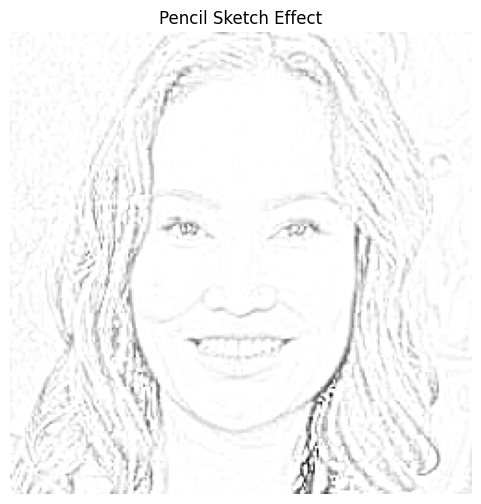

In [11]:
# Invert the blurred image
inverted_blur = 255 - blurred

# Blend using dodge technique
def dodgeV2(image, mask):
    return cv2.divide(image, 255 - mask, scale=256)

sketch = dodgeV2(gray, inverted_blur)

plt.figure(figsize=(6,6))
plt.title("Pencil Sketch Effect")
plt.imshow(sketch, cmap='gray')
plt.axis('off')
plt.show()


In [12]:
cv2.imwrite('pencil_sketch.png', sketch)
print("Sketch saved as pencil_sketch.png")

Sketch saved as pencil_sketch.png
